CIS 9 - Lab 3: supervised learning

In [430]:
# Name: Srinivas Jakkula

1. Create a model to predict health insurance cost for someone, given their basic health information. The input file to train and test your model is _insurance.xlsx_, (from [source]( https://www.kaggle.com/mirichoi0218/insurance))

1a. Read in the insurance.xlsx file into a DataFrame. Print the size of the DataFrame and the first 5 data records

In [431]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn.linear_model as lm
data = pd.read_excel("insurance.xlsx")
print(data)
print(data.shape)
print(data.head(5))


      age  gender     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
(1338, 7)
   age  gender     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1 

1b. Do some preliminary investigation to see if there's any correlation between each of the input features and the resulting charges (the output).
<br>Which feature has the strongest correlation to the charges? Prove your answer.

In [432]:
# Smoker has the strongest correlation to the charges

1c. Recall that all data need to be numeric values for scikit-learn (why?)
<br>Change the data in the columns: 'gender', 'smoker', and 'region' to numeric values (0,1,2...)
<br>To change a column named 'col' in a DataFrame named df:
- col = {'oldvalue1':num1, 'oldvalue2':num2, 'oldvalue3':num3, 'oldvalue4':num4, ... }
- df.replace(col, inplace = True)

It's up to you how to assign the numeric value. Standard practice is to assign 0,1,2,3...
<br>For example, smoker = 0, non-smoker = 1

For gender and smoker columns, it's okay to hardcode the dictionary since there are only 2 key:value pairs. For the region column, _make sure to use features of pandas and Python_ to create the dictionary, don't hard code any key or value.

In [433]:
gender = {'female':0, 'male':1}
data.replace(gender, inplace=True)
smoker={"yes":0, "no":1}
data.replace(smoker, inplace=True)

# Method 1
d = data['region'].unique()
region = {j:i for i, j in enumerate(d)}
data.replace(region, inplace=True)
print(data)

# Method 2

# d = set(data.region.to_dict().values())
# print(d)
# region = {j:i for i, j in enumerate(d)}
# print(region)
# data.replace(region, inplace=True)
# data


      age  gender     bmi  children  smoker  region      charges
0      19       0  27.900         0       0       0  16884.92400
1      18       1  33.770         1       1       1   1725.55230
2      28       1  33.000         3       1       1   4449.46200
3      33       1  22.705         0       1       2  21984.47061
4      32       1  28.880         0       1       2   3866.85520
...   ...     ...     ...       ...     ...     ...          ...
1333   50       1  30.970         3       1       2  10600.54830
1334   18       0  31.920         0       1       3   2205.98080
1335   18       0  36.850         0       1       1   1629.83350
1336   21       0  25.800         0       1       0   2007.94500
1337   61       0  29.070         0       0       2  29141.36030

[1338 rows x 7 columns]


1d. From the DataFrame, create the X and y datasets.
<br>Start with the features with the strongest correlation, then experiment to see which other features to include in the X dataset.

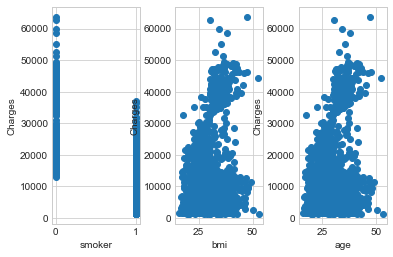

In [434]:
# X = pd.DataFrame(data, columns=data.smoker)

plt.subplot(1,3,1)
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.scatter(data.smoker,data.charges)
plt.xlabel('smoker')
plt.ylabel('Charges')

plt.subplot(1,3,2)
plt.scatter(data.bmi,data.charges)
plt.xlabel('bmi')
plt.ylabel('Charges')

plt.subplot(1,3,3)
plt.scatter(data.bmi,data.charges)
plt.xlabel('age')
plt.ylabel('Charges')

# X = data.smoker.to_frame()
X = X = data[['smoker','bmi', "age"]]
y = data.charges
# print(X)
# print(y)

In [435]:
# plt.scatter(data.bmi,data.charges)
# plt.xlabel('bmi')
# plt.ylabel('Charges')

In [436]:
#

1e. Split the X, y datasets into the training and testing sets
<br>Show the size of each set.

In [437]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.size, X_test.size, y_train.size, y_test.size)


(1003, 3) (335, 3) (1003,) (335,)
3009 1005 1003 335


1f. Choose the appropriate scikit-learn algorithm. (Hint: is this regression or classification?)
<br>Then train and test the model. 

In [438]:
regr = lm.LinearRegression()
regr = regr.fit(X_train, y_train)
# y_pred = regr.predict(X_test)
# # use a DataFrame to visually compare the 2 actual data and the predicted data
# df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# df

coeff = pd.DataFrame(regr.coef_, X.columns, columns=['Coefficient'])
print(coeff)
y_pred = regr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

         Coefficient
smoker -23903.561437
bmi       330.322523
age       258.181869
           Actual     Predicted
1196  33307.55080  26746.393814
1245   5615.36900   3277.024368
1290   7133.90250   4421.940086
206   11743.29900  11974.339618
261   17085.26760  25954.150060
...           ...           ...
465   19521.96820  29044.665439
188    6775.96100   9242.936604
1252  16232.84700  26106.098420
1115  10807.48630  13012.734361
211    8162.71625   8547.077391

[335 rows x 2 columns]


1g. Show the accuracy of the model, and go back to step 1d to see what features to include in the X dataset.
- The answer you submit should only be the _final one_, with all the X features you think are necessary. Don't include all the testing you did for your answer.
- Also show why you included the features you chose for the X dataset. Ideally you would show the reason why with data and not just with a text explanation.

In [439]:
from sklearn import metrics

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',RMSE)
chargesMean = np.mean(data.charges)
print('Mean Delivery Time:', chargesMean)
print('Percent error:', RMSE/chargesMean*100)
print('R^2 value:', regr.score(X,y))

# When I have selected X value as X = data[['smoker','bmi', "age"]] then R^2 value is .746. 
# Even if I include other features, then there is not much increase in the R^2 value and hence, 
# I conclude that "smoker, bmi, age playes key role in charges "

Root Mean Squared Error: 6381.625001619905
Mean Delivery Time: 13270.422265141257
Percent error: 48.089087702831854
R^2 value: 0.7473812607452623


---

2. Create a model to predict whether someone is likely to make above $50K or not. The input file to train and test your data is in _incomeEval.xlsx_ (from: [source](https://www.kaggle.com/lodetomasi1995/income-classification))

2a. Read in the incomeEval.xlsx file into a DataFrame. Print the size of the DataFrame and the first 5 data records

In [440]:
incomedata = pd.read_excel("incomeEval.xlsx")
# print(incomedata)
print(incomedata.shape)
print(incomedata.size)
print(incomedata.head(5))

(32561, 15)
488415
   age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th               7   
4   28            Private   338409   Bachelors              13   

        marital-status          occupation    relationship    race   gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week  native-country  income  
0           2174              0   

2b. Modify the DataFrame so it only contains data for the US (the native-country column) and for workers with 40 or more hours per week.
<br>To select columns, you will need to inspect the column labels carefully. It might be useful to change the column labels to make them easier to work with. Sometimes data can be messy, but pandas gives us the tools to clean it up.
<br>Show the first 5 lines of the resulting DataFrame

In [441]:
incomedata.columns = incomedata.columns.str.extract('([a-z]+)$',expand=False)
print(incomedata.columns)
# print(incomedata[incomedata.country == ' United-States'])
# print(incomedata[incomedata.country == ' United-States' & incomedata.week >= 40])
cond1 = incomedata.country == ' United-States'
cond2 = incomedata.week >= 40
us_data = incomedata[cond1 & cond2]
print(us_data.head(5))
print(us_data.shape)


Index(['age', 'workclass', 'fnlwgt', 'education', 'num', 'status',
       'occupation', 'relationship', 'race', 'gender', 'gain', 'loss', 'week',
       'country', 'income'],
      dtype='object')
   age          workclass  fnlwgt   education  num               status  \
0   39          State-gov   77516   Bachelors   13        Never-married   
2   38            Private  215646     HS-grad    9             Divorced   
3   53            Private  234721        11th    7   Married-civ-spouse   
5   37            Private  284582     Masters   14   Married-civ-spouse   
7   52   Self-emp-not-inc  209642     HS-grad    9   Married-civ-spouse   

           occupation    relationship    race   gender  gain  loss  week  \
0        Adm-clerical   Not-in-family   White     Male  2174     0    40   
2   Handlers-cleaners   Not-in-family   White     Male     0     0    40   
3   Handlers-cleaners         Husband   Black     Male     0     0    40   
5     Exec-managerial            Wife   White   

2c. Remove the 'fnlwgt', 'education-num', 'marital-status', 'relationship', 'capital-gain', 'capital-loss', and 'native-country' columns from the DataFrame. They are either redundant or don't affect the output salary prediction.
<br>Print the first 5 lines of the resulting DataFrame.

In [442]:
# Method 1
updated_us_data= us_data.drop(columns=["fnlwgt","num", "status", "relationship", "gain", "loss", "country"])
print(updated_us_data.head(5))

#Method 2. In place 
us_data.drop(columns=["fnlwgt","num", "status", "relationship", "gain", "loss", "country"], inplace=True)
us_data.head(5)
# print(us_data)
# print()
#

   age          workclass   education          occupation    race   gender  \
0   39          State-gov   Bachelors        Adm-clerical   White     Male   
2   38            Private     HS-grad   Handlers-cleaners   White     Male   
3   53            Private        11th   Handlers-cleaners   Black     Male   
5   37            Private     Masters     Exec-managerial   White   Female   
7   52   Self-emp-not-inc     HS-grad     Exec-managerial   White     Male   

   week  income  
0    40   <=50K  
2    40   <=50K  
3    40   <=50K  
5    40   <=50K  
7    45    >50K  


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,age,workclass,education,occupation,race,gender,week,income
0,39,State-gov,Bachelors,Adm-clerical,White,Male,40,<=50K
2,38,Private,HS-grad,Handlers-cleaners,White,Male,40,<=50K
3,53,Private,11th,Handlers-cleaners,Black,Male,40,<=50K
5,37,Private,Masters,Exec-managerial,White,Female,40,<=50K
7,52,Self-emp-not-inc,HS-grad,Exec-managerial,White,Male,45,>50K


2d. Change all text data in each column into numeric values (0,1,2...)
<br>For each column, use the same way as step 1c above where you don't have to hard code any key or value. But don't copy-and-paste the same code for each column, use a loop to go through each column.
<br>Print the first 5 lines of the resulting DataFrame

In [443]:
# d = set(data.region.to_dict().values())
# print(d)
# region = {j:i for i, j in enumerate(d)}
# print(region)
# data.replace(region, inplace=True)

# print(us_data.dtypes)
# print(us_data.columns)
# print(us_data.select_dtypes("object").columns)
# for col in us_data.columns[1:]:
for col in us_data.select_dtypes("object").columns:
    # print(col)
    d = us_data[col].unique()
    # print(d)
    col = {j:i for i, j in enumerate(d)}
    us_data.replace(col, inplace=True)

us_data.head(5)
    

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,age,workclass,education,occupation,race,gender,week,income
0,39,0,0,0,0,0,40,0
2,38,1,1,1,0,0,40,0
3,53,1,2,1,1,0,40,0
5,37,1,3,2,0,1,40,0
7,52,2,1,2,0,0,45,1


2e. From the DataFrame, create the X and y datasets. You may not need all the columns for the X dataset.
<br>Print the size of the X and y datasets

In [444]:
y = us_data.income
X = us_data.drop(columns=["week", 'income'])
print(y.shape)
print(X.shape)
X.head()

(22174,)
(22174, 6)


,age,workclass,education,occupation,race,gender
0,39,0,0,0,0,0
2,38,1,1,1,0,0
3,53,1,2,1,1,0
5,37,1,3,2,0,1
7,52,2,1,2,0,0


2f. Split the X, y datasets into the training and testing datasets

In [445]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16630, 6) (5544, 6) (16630,) (5544,)


2g. Use the models that we've discussed in class to see which X features and model have the most accurate prediction. You may have to go back to step 2e to experiment with the X features and the accuracy.
<br>Show the _final_ accuracy score and confusion matrix for each model. Don't include all the experimental data you had to arrive at the final answer.

In [446]:
# from sklearn.tree import DecisionTreeRegressor

# regr = DecisionTreeRegressor()
# regr = regr.fit(X_train, y_train)

# y_pred = regr.predict(X_test)
# df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# print(df.shape)
# print(df)

# metrics.accuracy_score(y_test, y_pred)
# print(metrics.confusion_matrix(y_test, y_pred, labels=np.arange(1,8)))


from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.shape)
print(df)

print(metrics.accuracy_score(y_test, y_pred))

# # print(metrics.confusion_matrix(y_test, y_pred, labels=np.arange(1,8)))

# # we loop through K values from 1 to 50, using the same X and y datasets
# errors = []
# for i in np.arange(1, 50):
#     c = KNeighborsClassifier(n_neighbors = i)
#     c.fit(X_train, y_train)
#     y_pred = c.predict(X_test)
#     errors.append(np.mean(y_pred != y_test))
    
# # see what the error rate looks like
# plt.style.use('seaborn-whitegrid')
# plt.plot(errors)


from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.shape)
print(df)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

(5544, 2)
       Actual  Predicted
29803       1          0
8195        1          1
6970        0          0
18511       1          1
9988        0          1
...       ...        ...
30910       1          0
3644        0          0
1302        1          0
30235       1          1
5269        1          0

[5544 rows x 2 columns]
0.7537878787878788
(5544, 2)
       Actual  Predicted
29803       1          0
8195        1          1
6970        0          0
18511       1          0
9988        0          1
...       ...        ...
30910       1          0
3644        0          0
1302        1          0
30235       1          1
5269        1          1

[5544 rows x 2 columns]
Accuracy: 0.702922077922078


2h. In your own words, what algorithm and X features would you use as your model to predict salaries, and why?

In [447]:
# KNeighborsClassifier algoithm with  "age	workclass	education	occupation	race	gender" features
# provided the accuracy of 75.48 %. 
# As this KNeighborsClassifier algorithm providing the highest accuracy using k_neighbors=8 with 
# "age	workclass	education	occupation	race	gender" feature I will use this model to predict the salaries.

